In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import legendre, factorial,eval_legendre
from pandas import *
from scipy.optimize import fsolve
from scipy.special import hankel2
from sympy import init_printing, evalf, S,lambdify
from scipy.integrate import quad, odeint
from mpmath import findroot
init_printing()
%matplotlib notebook

In [2]:
m=40.
EI=20
dd=0
#Kξ=24
#Kα=96
Kα,Kξ=sp.symbols('Kα,Kξ')
x=np.poly1d([1,0])
Sα=quad(m*(x-dd),-1, 1)[0]
Iα=quad(m*(x-dd)**2,-1, 1)[0]
#b=0.5

In [3]:
tol=1e-10
n = int(input(""))
n=n+1
nn=n
if n%2!=0:
    n=n+1
    nn=n-1
    

l=[legendre(i) for i in range(n)]
for k in range(n):
    for kk in range(n):
        if np.abs(l[k][kk])<tol:
            l[k][kk]=0
lp=l[2:n:2]
li=l[3:n:2]

t=[0 for i in range(n)]
t[0]=np.poly1d([1.])
t[1]=np.poly1d([1., 0.])
for i in range(2,n):
    t[i]=2*t[1]*t[i-1]-t[i-2]
tp=t[0:n:2]
ti=t[1:n:2]
x = sp.Symbol("x")
x1 = sp.Symbol("x1")
x2 = sp.Symbol("x2")
x3=  sp.Symbol("x3")
x4 = sp.Symbol("x4")
x5 = sp.Symbol("x5")
x6 = sp.Symbol("x6")
x7=  sp.Symbol("x7")
x8 = sp.Symbol("x8")
x9 = sp.Symbol("x9")
x10 = sp.Symbol("x10")
xx=[x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
xxp=[xx[i]*tp[i] for i in range(n//2)]
cpp = [[0 for x in range(n//2)] for y in range(n//2-1)] 
for i in range((n//2)-1):
    cp=sp.solve(np.sum(xxp[:i+2])-lp[i])
    cpp[i]=[cp[xx[j]] for j in range(i+2)]
#cpp=np.pad(cpp, (0, 2), 'constant')
xxi=[xx[i]*ti[i] for i in range(n//2)]
cii = [[0 for x in range(n//2)] for y in range(n//2-1)] 
for i in range((n//2)-1):
    ci=sp.solve(np.sum(xxi[:i+2])-li[i])
    cii[i]=[ci[xx[j]] for j in range(i+2)]
#cii=np.pad(cii, (0, 2), 'constant')
s = [[0 for x in range(n)] for y in range(n-2)] 
for j in range((n//2)-1):
    for i in range(2+j):
        s[2*j][2*i]=cpp[j][i]
        s[2*j+1][2*i+1]=cii[j][i]

s=np.transpose(s)
s= np.asarray(s, dtype=np.float)

Me = np.zeros((nn,nn),dtype=np.float)
Ce = np.zeros((nn,nn),dtype=np.float)
Ke = np.zeros((nn,nn),dtype=np.float)
Ge = np.zeros((nn,nn),dtype=np.float)
l=np.array([legendre(i+2) for i in range(n-2)]) 
l=l[:nn-1]
lT=l[:,np.newaxis]
el=np.array([eval_legendre(i+2,dd) for i in range(nn-2)])
#el=el[:nn-1]
elT=el[:,np.newaxis]
ld=np.array([np.polyder(legendre(i+2),2) for i in range(n-2)])
ld=ld[:nn-1]
ldT=ld[:,np.newaxis]

In = np.zeros((nn-2,nn-2))
Kn = np.zeros((nn-2,nn-2))
Kξη=np.zeros(nn-2,dtype=np.object)
H=np.zeros(nn-2)

mm=lT*m*l
mmm=ldT*EI*ld
κη=elT*Kξ*el 

for i in range(nn-2): 
    Kξη[i]=Kξ*el[i]
    H[i]=quad((l[i])*m, -1,1)[0]
    for j in range(nn-2):
        In[i,j]=quad(mm[i][j], -1, 1)[0]
        Kn[i,j]=quad(mmm[i][j],-1,1)[0]

        
        
        
for k in range(nn-2):
    for kk in range(nn-2):
            if np.abs(In[k,kk])<tol:
                In[k,kk]=0
            if np.abs(Kn[k,kk])<tol:
                Kn[k,kk]=0

if nn%2!=0:
    s=s[:nn,:nn-2]
n=nn

5


C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [4]:
def E(n):
    D=np.zeros((n,n),dtype=np.float64)
    dm=np.zeros(n,dtype=np.float64)[:,np.newaxis]
    b=np.zeros(n,dtype=np.float64)
    c=np.array([2/(i+1) for i in range(n)],dtype=np.float64)[:,np.newaxis]
    dm[0]=1/2

    for i in range(n):
        for j in range(n):
            if i==j+1:
                D[i,j]=(1/2)/(i+1)
            if i==j-1:
                D[i,j]=-(1/2)/(i+1)
    
    for i in range(1,n):
        b[i-1]=(-1)**(i+1)*factorial(n+i-1)/(factorial(n-i-1)*factorial(i)**2)
    b[n-1]=(-1)**(n+1)
    
    #for i in range(1,n+1):
        #b[i-1]=(-1)**(i-1)*factorial(n)/(factorial(i)*factorial(n-i))
        
    dTm=np.transpose(dm)


    E=(D+dm*b+c*dTm+0.5*c*b)
    
    return E,c,b

In [5]:
for i in range (n):
    Ke[0,i] = i
    Ke[i,i] = -i/2

In [6]:
for i in range(n):
    for j in range(n):
        if i==j+1:
            Ce[i,j]=-0.5
        if i==j-1:
            Ce[i,j]= 0.5
Ce[0,0]=1
Ce[0,1]=1

In [7]:
for i in range(n):
    for j in range(n):
        if i==j+1:
            Ge[i,j]=-1/4
        if i==j-1:
            Ge[i,j]=1/4
Ge[0,1]=0.5
Ge[1,0]=0

In [8]:
Me[0,0]=0.5
Me[1,1]=1/16
Me[0,2]=Me[2,0]=-1/4
for i in range(2,n):
    Me[i,i]=i/(4*(i**2-1))
for i in range(2,n-1):
    Me[i-1,i+1]=Me[i+1,i-1]=-1/(8*i)

In [9]:
ρ=sp.Symbol('ρ')
b=sp.Symbol('b')
d=sp.Symbol('d')
U0=sp.Symbol('U0')
u0=sp.Symbol('u0')
η0=sp.Symbol('η0')
η1=sp.Symbol('η1')
η2=sp.Symbol('η2')
η3=sp.Symbol('η3')
η4=sp.Symbol('η4')
η5=sp.Symbol('η5')
η6=sp.Symbol('η6')
η7=sp.Symbol('η7')
η8=sp.Symbol('η8')
η9=sp.Symbol('η9')
η10=sp.Symbol('η10')
η11=sp.Symbol('η11')
η12=sp.Symbol('η12')
η13=sp.Symbol('η13')
η14=sp.Symbol('η14')
η=sp.Symbol('η')
η0p=sp.Symbol('η0p')
η1p=sp.Symbol('η1p')
η2p=sp.Symbol('η2p')
η3p=sp.Symbol('η3p')
η4p=sp.Symbol('η4p')
η5p=sp.Symbol('η5p')
η6p=sp.Symbol('η6p')
η7p=sp.Symbol('η7p')
η8p=sp.Symbol('η8p')
η9p=sp.Symbol('η9p')
η10p=sp.Symbol('η10p')
η11p=sp.Symbol('η11p')
η12p=sp.Symbol('η12p')
η13p=sp.Symbol('η13p')
η14p=sp.Symbol('η14p')
ηp=sp.Symbol('ηp')
η0s=sp.Symbol('η0s')
η1s=sp.Symbol('η1s')
η2s=sp.Symbol('η2s')
η3s=sp.Symbol('η3s')
η4s=sp.Symbol('η4s')
η5s=sp.Symbol('η5s')
η6s=sp.Symbol('η6s')
η7s=sp.Symbol('η7s')
η8s=sp.Symbol('η8s')
η9s=sp.Symbol('η9s')
η10s=sp.Symbol('η10s')
η11s=sp.Symbol('η11s')
η12s=sp.Symbol('η12s')
η13s=sp.Symbol('η13s')
η14s=sp.Symbol('η14s')
ηs=sp.Symbol('ηs')
α=sp.Symbol('α')
αp=sp.Symbol('αp')
αs=sp.Symbol('αs')
t=sp.Symbol('t')
ξ=sp.Symbol('ξ')
ξp=sp.Symbol('ξp')
ξs=sp.Symbol('ξs')
d=sp.Symbol('d')
v0=sp.Symbol('v0')
v1=sp.Symbol('v1')
v=sp.Symbol('v')
v0p=sp.Symbol('v0p')
v1p=sp.Symbol('v1p')
vp=sp.Symbol('vp')
λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9=sp.symbols('λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9')
λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p=sp.symbols('λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p')
η=[η0,η1,η2,η3,η4,η5,η6,η7,η8,η9,η10,η11,η12,η13,η14]
ηp=[η0p,η1p,η2p,η3p,η4p,η5p,η6p,η7p,η8p,η9p,η10p,η11p,η12p,η13p,η14p]
ηs=[η0s,η1s,η2s,η3s,η4s,η5s,η6s,η7s,η8s,η9s,η10s,η11s,η12s,η13s,η14s]
v0=U0*α+ξp-d*αp
v1=b*αp
v0p=U0*αp+ξs-d*αs
v1p=b*αs
v=[v0,v1]
v=np.pad(v, (0, n-2), 'constant')
vp=[v0p,v1p]
vp=np.pad(vp, (0, n-2), 'constant')
vp=vp[:,np.newaxis]
v=v[:,np.newaxis]
λ0v=[λ0]
λ0v=np.pad(λ0v, (0, n-1), 'constant')
λ0v=λ0v[:,np.newaxis]
λ=[λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9]
λp=[λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p]

In [10]:
a=np.zeros(n,dtype=np.object)
aa=np.zeros(n,dtype=np.object)
aaa=np.zeros(n,dtype=np.object)
aaaa=np.zeros(n,dtype=np.object)
for j in range(n):
    for i in range(2,n):
        a[j]+=s[j,i-2]*ηs[i]
        aa[j]+=s[j,i-2]*ηp[i]
        aaa[j]+=s[j,i-2]*η[i]
    a[j]+=vp[j]
    aa[j]+=v[j]-λ0v[j]
    aaaa[j]+=-U0*v[j]+U0*λ0v[j]
    
aA=b**2*np.dot(Me,a)
aaA=b*U0*np.dot(Ce,aa)
aaaA=U0**2*np.dot(Ke,aaa)
aaaaA=b*np.dot(Ge,aaaa)

In [11]:
L=np.zeros(n,dtype=np.object)
for i in range(n):    
    L[i]=(2*np.pi*ρ)*(-aA[i]-aaA[i]-aaaA[i]-aaaaA[i])
    #L[i][0]=(L[i][0]).subs([(b, 0.5),(d,0)])
M=-d*L[0]+b*L[1]
LL=-L[0]
N=np.zeros_like(L)
N=np.dot(s.T,L)


In [28]:
def estatico(bb,dd,m,Sα,Iα,Kξ,Kα,α0,EI,UU0,ρρ,n):
    η[0]=ξ
    η[1]=α
    A=np.zeros((2+n,2+n))
    B=np.zeros((2+n))
    x=np.poly1d([1/bb,0])
    Kn = np.zeros((n,n))
    Kξη=np.zeros((n))
    ld=np.array([np.polyder(legendre(i+2)(x),2) for i in range(n)])
    el=np.array([eval_legendre(i+2,dd/bb) for i in range(n)])
    ldT=ld[:,np.newaxis]
    elT=el[:,np.newaxis]
    mmm=ldT*ld
    
    for i in range(n):
        Kξη[i]=Kξ*el[i]
        for j in range(n):
            Kn[i,j]=quad(mmm[i][j],-bb,bb)[0]
        
    A[0,0]=Kξ
    A[1,1]=Kα
    A[0,2:]=Kξη
    A[2:,0]=Kξη
    for i in range(2+n):
        A[0,i]+=-sp.diff(L[0][0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        A[1,i]+=-sp.diff(M[0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        for j in range(n):
            A[2+j,i]+=-sp.diff(N[j][0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
            
    A[2:,2:]+=elT*Kξ*el
    A[2:,2:]+=EI*Kn
    B[1]=Kα*α0
    
    return la.solve(A,B)

In [29]:
vel=np.linspace(0,60,1000)
rig=np.linspace(350,5000,1000)

In [34]:
estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,vel[i],1.225,2)

array([ 0.20482165, -0.1410382 ,  0.01077745, -0.00184887])

In [37]:
plot=np.zeros((4,1000))
for j in range(4):
    for i in range(1000):
        plot[j,i]=estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,vel[i],1.225,j+2)[1]

In [31]:
plott=np.zeros(1000)
for i in range(1000):
    plott[i]=estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,vel[i],1.225,0)[1]*180/np.pi

In [32]:
plott[i]

<IPython.core.display.Javascript object>


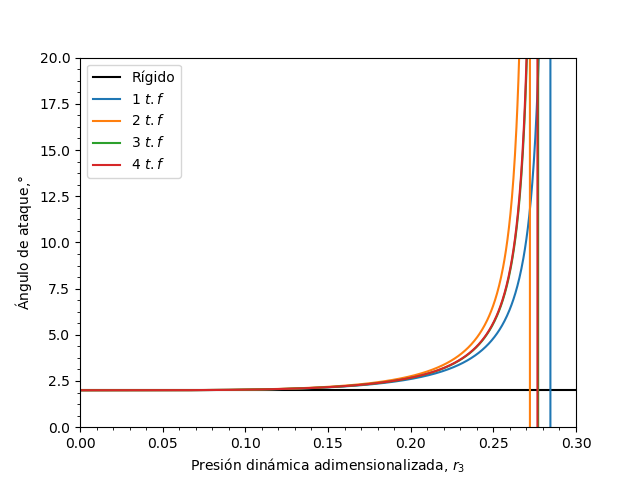

In [38]:
plt.figure()
plt.plot(plott,label='Rígido',color='black')
for j in range(4):
    plt.plot(vel/200,plot[j]*180/np.pi,label=r'$%d$ $t.f$'%(j+1))

plt.xlim(0,0.3)
plt.ylim(0,20)
plt.xlabel('Presión dinámica adimensionalizada,' r' $r_%d$'%3)
plt.ylabel('Ángulo de ataque,'r'$\degree$')
plt.legend(loc='best')

plt.minorticks_on()

In [49]:
plot1=np.zeros((4,1000))
for j in range(4):
    for i in range(1000):
        plot1[j,i]=estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,rig[i],50,1.225,2+j)[0]


In [479]:
estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,50,1.225,0)

array([-0.04198009,  0.03490659])

<IPython.core.display.Javascript object>


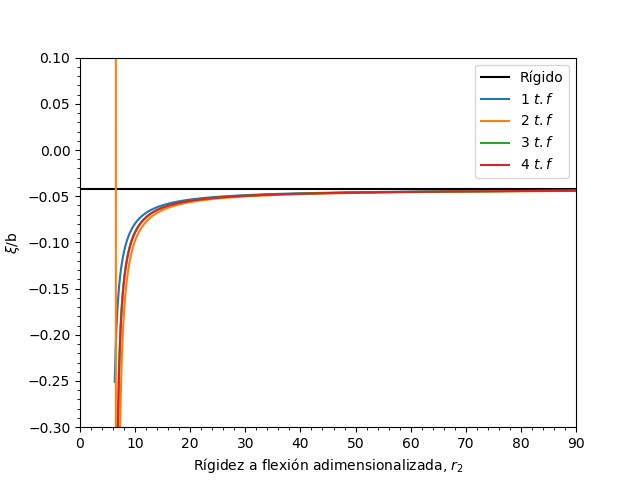

In [118]:
plt.figure()
plt.axhline(-0.04198009,label='Rígido',color='black')
for j in range(4):
    plt.plot(rig/500*9,plot1[j],label=r'$%d$ $t.f$'%(j+1))
plt.xlim(0,90)

plt.ylim(-0.3,0.1)
plt.legend(loc='best')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel(r'$\xi$/b')
plt.minorticks_on()

In [51]:
plot2=np.zeros((4,1000))
for j in range(4):
    for i in range(1000):
        plot2[j,i]=estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,rig[i],50,1.225,2+j)[1]*180/np.pi

In [489]:
estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,50,1.225,0)[1]*180/np.pi

<IPython.core.display.Javascript object>


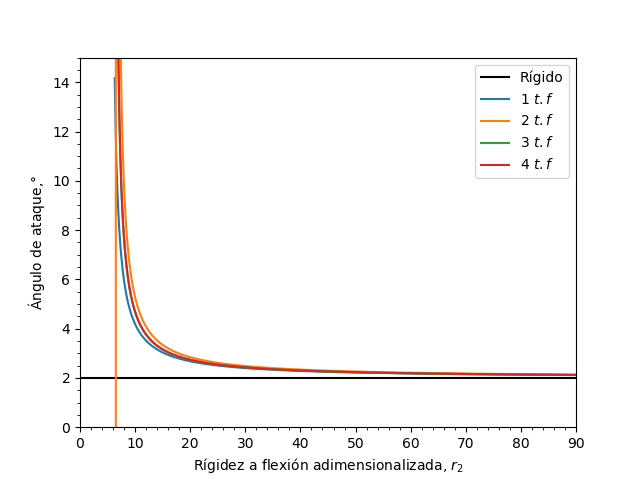

In [112]:
plt.figure()
plt.axhline(2,label='Rígido',color='black')
for j in range(4):
    plt.plot((rig/500)*9,plot2[j],label=r'$%d$ $t.f$'%(j+1))
plt.xlim(0,90)

plt.ylim(0,15)
plt.legend(loc='best')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel('Ángulo de ataque,'r'$\degree$')
plt.minorticks_on()

In [52]:
plot3=np.zeros((1000))
for i in range(1000):
    plot3[i]=estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,rig[i],50,1.225,4)[2]

<IPython.core.display.Javascript object>


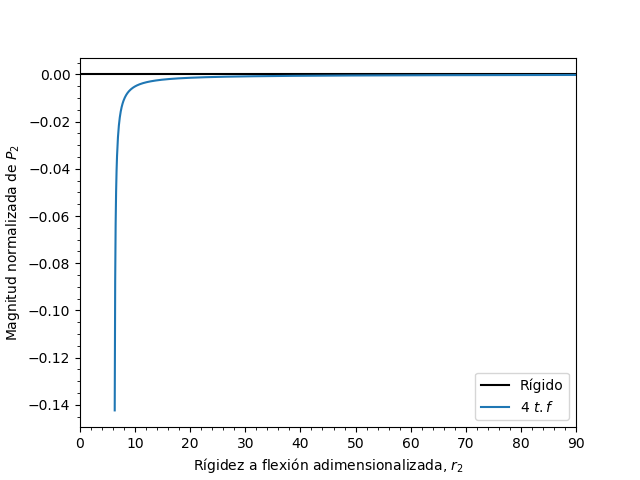

In [114]:
plt.figure()
plt.axhline(0,label='Rígido',color='black')
plt.plot((rig/500)*9,plot3,label=r'$%d$ $t.f$'%(4))
plt.xlim(0,90)

plt.ylabel('Magnitud normalizada de'' $P_%d$'%2)
#plt.ylim(-2,1)
plt.legend(loc='best')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.minorticks_on()

In [53]:
plot4=np.zeros((1000))
for i in range(1000):
    plot4[i]=estatico(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,rig[i],50,1.225,4)[3]

<IPython.core.display.Javascript object>


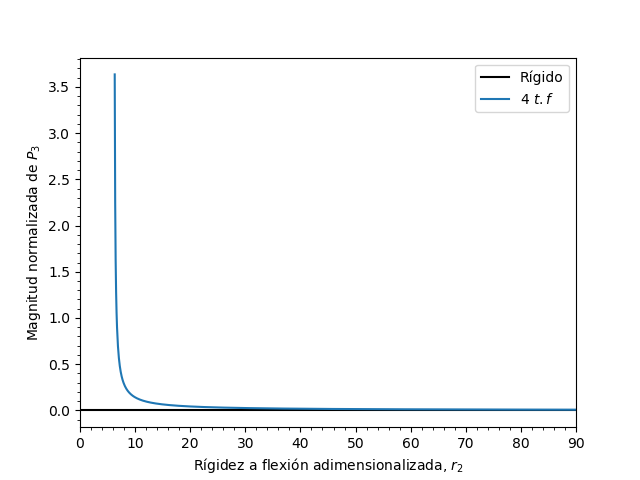

In [119]:
plt.figure()
plt.axhline(0,label='Rígido',color='black')
plt.plot(rig/500*9,plot4*100,label=r'$%d$ $t.f$'%4)
plt.xlim(0,90)

plt.ylabel('Magnitud normalizada de'' $P_%d$'%3)

#plt.ylim(-0.001,0.4)
plt.legend(loc='best')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.minorticks_on()

In [37]:
def estaticoa(bb,a,r1,r2,r3,n):
    η[0]=ξ
    η[1]=α
    A=np.zeros((2+n,2+n),dtype=object)
    B=np.zeros((2+n))
    x=np.poly1d([1/bb,0])
    Kn = np.zeros((n,n))
    Kξη=np.zeros((n))
    ld=np.array([np.polyder(legendre(i+2)(x),2) for i in range(n)])
    el=np.array([eval_legendre(i+2,a) for i in range(n)])
    ldT=ld[:,np.newaxis]
    elT=el[:,np.newaxis]
    mmm=ldT*ld
    for i in range(n):
        for j in range(n):
            Kn[i,j]=quad(mmm[i][j],-1,1)[0]
        
    A[0,0]=1
    A[0,2:]=el
    A[2:,0]=el
    for i in range(2+n):
        A[0,i]+=-sp.diff(L[0][0],η[i])/(U0**2*ρ*0.5)*r3
        A[1,i]+=(-sp.diff(M[0],η[i])/(U0**2*ρ*0.5*4)*r3).subs([(d,a)])
        for j in range(n):
            A[2+j,i]+=-sp.diff(N[j][0],η[i])/(U0**2*ρ*0.5)*r3
            
    A[:,1]=A[:,1]/b
    A[1,1:]=A[1,1:]/b
    A[1,1]+=r1        
    A[2:,2:]+=elT*el
    A[2,2]+=r2*Kn[0,0]/18
    A[3:,3:]+=r2*Kn[1:,1:]/18
    
    B[1]=r1*2*np.pi/180
    A=np.asarray(A,dtype=np.float)
    
    return la.solve(A,B)

In [28]:
DataFrame(estaticoa(1,0,1,15,0.4,2))

,0,1,2,3
0,1.0,5.026548,7.039822,11.309734
1,0.0,0.371681,0.000000,-0.235619
2,-0.5,1.256637,14.307522,2.827433
3,0.0,-0.942478,0.000000,2246.701328


In [30]:
r3=np.linspace(0,0.6,1000)
r2=np.linspace(1.5,15,1000)

In [25]:
sp.diff(N[2][0],η4)

In [766]:
prueba=np.zeros((4,1000))
for j in range(4):
    for i in range(1000):
        prueba[j,i]=estaticoa(1,0,1,15,r3[i],2+j)[1]*180/np.pi

<IPython.core.display.Javascript object>


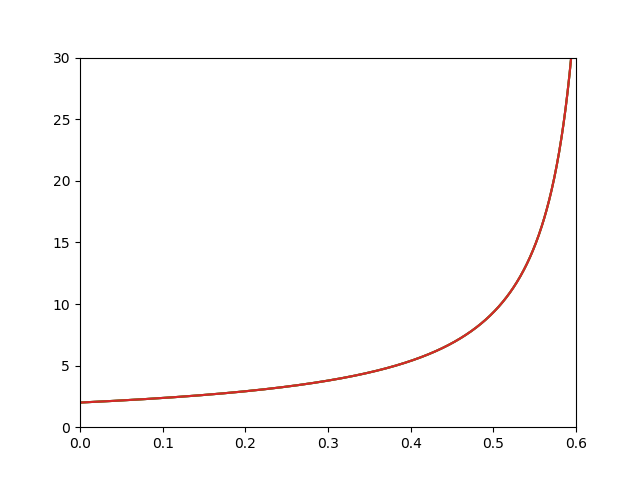

In [770]:
plt.figure()
for j in range(4):
    plt.plot(r3,prueba[j])
plt.xlim(0,0.6)
plt.ylim(0,30)